In [1]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
# Load the Iris dataset
iris = load_iris()
data, target = iris.data, iris.target


In [3]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [4]:
# Define the number of clusters
n_clusters = 3


In [5]:
# Implement RBF clustering using MiniBatchKMeans with Gaussian kernel
rbk_model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, init='k-means++', max_iter=300, random_state=42)
rbk_model.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=100, max_iter=300, n_clusters=3, random_state=42)

In [6]:
# Evaluate the clustering performance using silhouette score
silhouette_score_rbk = silhouette_score(scaled_data, rbk_model.labels_)


In [7]:
# Print the silhouette score
print(f"Silhouette score for RBF clustering: {silhouette_score_rbk:.4f}")


Silhouette score for RBF clustering: 0.4642


In [8]:
# Implement regular KMeans for comparison
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [9]:
# Evaluate the clustering performance using silhouette score
silhouette_score_kmeans = silhouette_score(scaled_data, kmeans_model.labels_)

In [10]:
# Print the silhouette score
print(f"Silhouette score for KMeans: {silhouette_score_kmeans:.4f}")


Silhouette score for KMeans: 0.4599


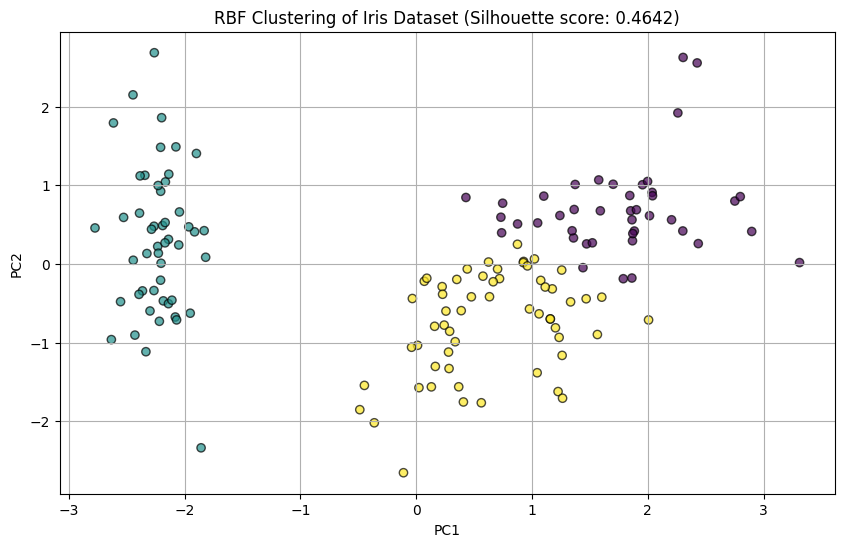

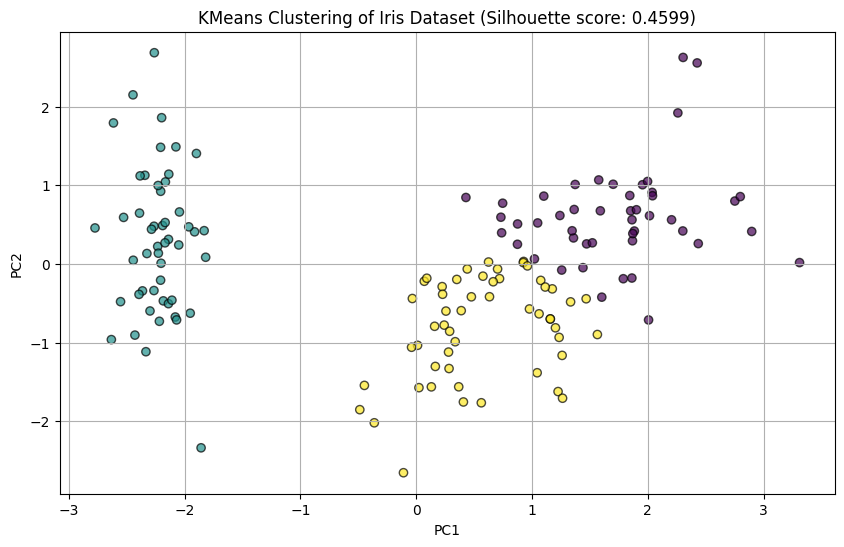

In [11]:
# Visualize the clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=rbk_model.labels_, cmap="viridis", edgecolor="black", alpha=0.7)
plt.title("RBF Clustering of Iris Dataset (Silhouette score: {:.4f})".format(silhouette_score_rbk))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_model.labels_, cmap="viridis", edgecolor="black", alpha=0.7)
plt.title("KMeans Clustering of Iris Dataset (Silhouette score: {:.4f})".format(silhouette_score_kmeans))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
